построим индикаторную кривую по Вогелю

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# импортируем библиотеку для расчета IPR
import neftpy.ureservoir as res

Коэффициент продуктивности скважины при фильтрации согласно закону Дарси определяется как

$$
  PI = \frac{Q_{liq}}{\Delta P}
$$

В этом случае зависимость забойного давления от дебита будет иметь вид прямой линии


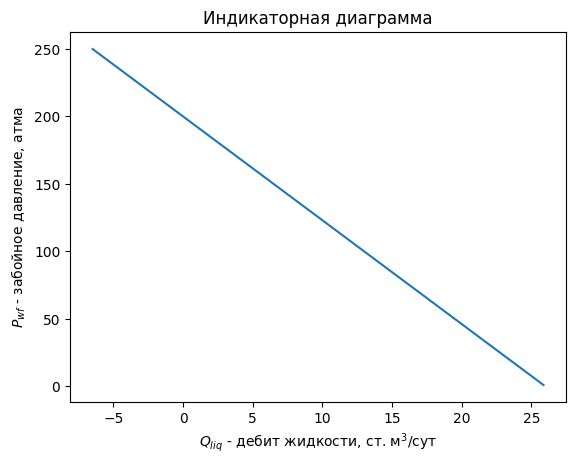

In [2]:
p = np.linspace(1, 250, 100)
fig, ax = plt.subplots()

q = res.ipr_Vogel_qliq_sm3day(p_test_atma = p, 
                              p_res_atma = 200, 
                              pi_sm3dayatm = 0.13, 
                              fw_perc = 0)
ax.set_title('Индикаторная диаграмма')
ax.set_xlabel('$Q_{liq}$ - дебит жидкости, ст. м$^3$/сут')
ax.set_ylabel('$P_{wf}$ - забойное давление, атма')

plt.plot(q, p)

Часто для учета выделения газа в призабойной зоне скважины используется поправка Вогеля для построения индикаторной кривой. Она учитывает, что при выделении газа около скважины перепад давления необходимый для фильтрации жидкости возрастает, добычные возможности скважины снижаются.

Коэффициент продуктивности с учетом поправки Вогеля для забойного давления ниже давления насыщения $P_{wf} < P_b$ можно записать в виде
$$
  J = \frac{Q_{oil}}{P_{res} - P_{b} + \dfrac{P_b}{1.8} \left( 1 - 0.2 \dfrac{P_{wf}}{P} - 0.8 \left( \dfrac{P_{wf}}{P} \right)^2 \right)}
$$

дебит нефти можно найти из выражения

$$
  Q_{oil} = Q_{ob} + (Q_{omaix} - Q_{ob}) \left(  1 - 0.2 \dfrac{P_{wf}}{P} - 0.8 \left( \dfrac{P_{wf}}{P} \right)^2 \right)
$$

где максимально возможные дебит нефти

$$Q_{omax}=Q_{ob} + \frac{J P_B}{1.8}$$

дебит нефти при давлении равном давлении насыщения

$$Q_{ob}=J (P_{res} - P_b) $$


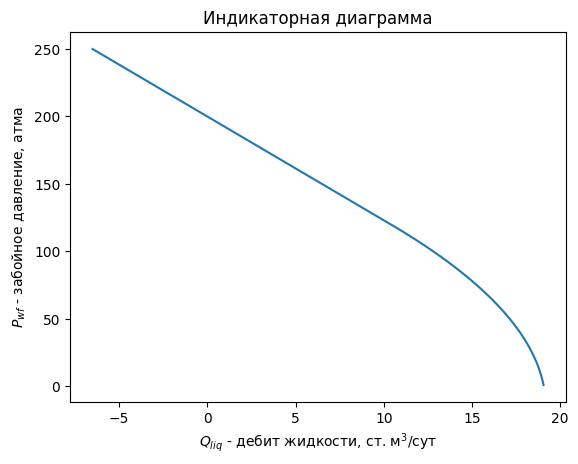

In [3]:
p = np.linspace(1, 250, 100)
fig, ax = plt.subplots()

q = res.ipr_Vogel_qliq_sm3day(p_test_atma = p, 
                              p_res_atma = 200, 
                              pi_sm3dayatm = 0.13, 
                              fw_perc = 0,
                              pb_atma = 120 )
ax.set_title('Индикаторная диаграмма')
ax.set_xlabel('$Q_{liq}$ - дебит жидкости, ст. м$^3$/сут')
ax.set_ylabel('$P_{wf}$ - забойное давление, атма')

plt.plot(q, p)

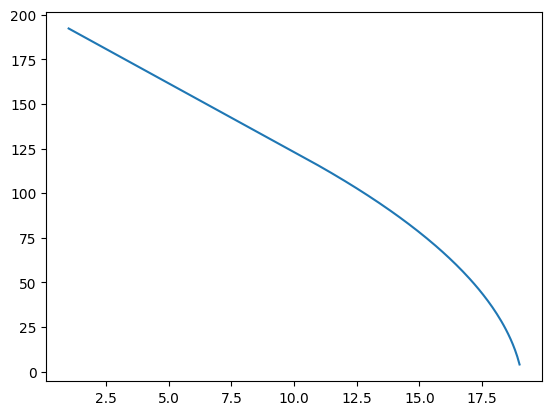

In [4]:
q = np.linspace(1, 19, 200)
p = res.ipr_Vogel_pwf_atma(q_test_sm3day = q, 
                           p_res_atma = 200, 
                           pb_atma = 120, 
                           pi_sm3dayatm = 0.13, 
                           fw_perc = 0)
plt.plot(q, p)

In [5]:
res._ipr_Vogel_pi_sm3dayatm(q_test_sm3day = 23, 
                           p_test_sm3day = 34, 
                           p_res_sm3day = 250, 
                           pb_atma = 100, 
                           fw_perc = 0)

0.11696501220504474